In [1027]:
# !pip install missingno

In [1028]:
# !pip install -U scikit-learn

In [1029]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns

from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.dummy import DummyRegressor

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Проверьте,-что-эффективность-обогащения-рассчитана-правильно.-Вычислите-её-на-обучающей-выборке-для-признака-rougher.output.recovery.-Найдите-MAE-между-вашими-расчётами-и-значением-признака.-Опишите-выводы." data-toc-modified-id="Проверьте,-что-эффективность-обогащения-рассчитана-правильно.-Вычислите-её-на-обучающей-выборке-для-признака-rougher.output.recovery.-Найдите-MAE-между-вашими-расчётами-и-значением-признака.-Опишите-выводы.-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Проверьте, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.</a></span></li><li><span><a href="#Проанализируйте-признаки,-недоступные-в-тестовой-выборке.-Что-это-за-параметры?-К-какому-типу-относятся?" data-toc-modified-id="Проанализируйте-признаки,-недоступные-в-тестовой-выборке.-Что-это-за-параметры?-К-какому-типу-относятся?-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?</a></span></li><li><span><a href="#Проведите-предобработку-данных" data-toc-modified-id="Проведите-предобработку-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Проведите предобработку данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Посмотрите,-как-меняется-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки.-Опишите-выводы" data-toc-modified-id="Посмотрите,-как-меняется-концентрация-металлов-(Au,-Ag,-Pb)-на-различных-этапах-очистки.-Опишите-выводы-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы</a></span></li><li><span><a href="#Сравните-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках.-Если-распределения-сильно-отличаются-друг-от-друга,-оценка-модели-будет-неправильной." data-toc-modified-id="Сравните-распределения-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках.-Если-распределения-сильно-отличаются-друг-от-друга,-оценка-модели-будет-неправильной.-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.</a></span></li><li><span><a href="#Исследуйте-суммарную-концентрацию-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах" data-toc-modified-id="Исследуйте-суммарную-концентрацию-всех-веществ-на-разных-стадиях:-в-сырье,-в-черновом-и-финальном-концентратах-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах</a></span></li><li><span><a href="#Посмотрим-на-наши-целевые-признаки---['final.output.recovery',-'rougher.output.recovery']" data-toc-modified-id="Посмотрим-на-наши-целевые-признаки---['final.output.recovery',-'rougher.output.recovery']-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Посмотрим на наши целевые признаки - ['final.output.recovery', 'rougher.output.recovery']</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Напишите-функцию-для-вычисления-итоговой-sMAPE" data-toc-modified-id="Напишите-функцию-для-вычисления-итоговой-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Напишите функцию для вычисления итоговой sMAPE</a></span></li><li><span><a href="#Обучите-разные-модели-и-оцените-их-качество-кросс-валидацией.-Выберите-лучшую-модель-и-проверьте-её-на-тестовой-выборке.-Опишите-выводы" data-toc-modified-id="Обучите-разные-модели-и-оцените-их-качество-кросс-валидацией.-Выберите-лучшую-модель-и-проверьте-её-на-тестовой-выборке.-Опишите-выводы-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы</a></span><ul class="toc-item"><li><span><a href="#Модель-1.-Поиск-наилучшей-модели-для-целевого-признака-'rougher.output.recovery'" data-toc-modified-id="Модель-1.-Поиск-наилучшей-модели-для-целевого-признака-'rougher.output.recovery'-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Модель 1. Поиск наилучшей модели для целевого признака 'rougher.output.recovery'</a></span></li><li><span><a href="#Модель-2.-Поиск-наилучшей-модели-для-целевого-признака-'final.output.recovery'" data-toc-modified-id="Модель-2.-Поиск-наилучшей-модели-для-целевого-признака-'final.output.recovery'-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Модель 2. Поиск наилучшей модели для целевого признака 'final.output.recovery'</a></span></li><li><span><a href="#Проверка-моделей-на-тестовой-выборке" data-toc-modified-id="Проверка-моделей-на-тестовой-выборке-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Проверка моделей на тестовой выборке</a></span></li></ul></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1030]:
TRAIN = pd.read_csv('/datasets/gold_recovery_train_new.csv')
TEST = pd.read_csv('/datasets/gold_recovery_test_new.csv')
FULL = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [1031]:
FULL.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [1032]:
TRAIN.shape, TEST.shape, FULL.shape

((14149, 87), (5290, 53), (19439, 87))

In [1033]:
TRAIN.columns

Index(['date', 'final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_clean

Видим, что у нас есть колонки:
- date - дата
- final.output - финальные параметры продукта
- primary_cleaner.input - первичная очистка параметры сырья
- primary_cleaner.output - первичная очистка параметры продукта
- primary_cleaner.state - первичная очистка и параметры, характеризующие текущее состояние этапа
- rougher.calculation - флотация, расчетные характеристики
- rougher.input - флотация параметры сырья
- rougher.output - флотация параметры продукта
- rougher.state - флотация и параметры, характеризующие текущее состояние этапа
- secondary_cleaner.output - вторичная очистка продукта
- secondary_cleaner.state - вторичная очистка и параметры, характеризующие текущее состояние этапа

### Проверьте, что эффективность обогащения рассчитана правильно. Вычислите её на обучающей выборке для признака rougher.output.recovery. Найдите MAE между вашими расчётами и значением признака. Опишите выводы.

In [1034]:
true_recovery = TRAIN['rougher.output.recovery']

f = TRAIN['rougher.input.feed_au']
c = TRAIN['rougher.output.concentrate_au']
t = TRAIN['rougher.output.tail_au']

pred_recovery = (c * (f - t))/(f * (c - t)) * 100
pred_recovery

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
14144    89.574376
14145    87.724007
14146    88.890579
14147    89.858126
14148    89.514960
Length: 14149, dtype: float64

In [1035]:
# вычислим mae
mae = mean_absolute_error(true_recovery, pred_recovery)
mae

9.682896147825551e-15

9.682896147825551e-15 - очень хороший показатель, фактически стремится к нулю, значит посчитано изначально верно.

### Проанализируйте признаки, недоступные в тестовой выборке. Что это за параметры? К какому типу относятся?

In [1036]:
TEST.isna().sum()

date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatb

Пропуски есть в колонках:
- primary_cleaner.input.sulfate                  4
- primary_cleaner.input.depressant               5
- primary_cleaner.input.xanthate                 4
- rougher.input.feed_rate                        3
- rougher.input.feed_size                        1
- rougher.input.feed_sol                        21
- rougher.input.floatbank10_sulfate              5
- rougher.input.floatbank11_sulfate              8
- rougher.input.floatbank11_xanthate            25
- secondary_cleaner.state.floatbank2_a_air       3
- secondary_cleaner.state.floatbank2_b_air       2
- secondary_cleaner.state.floatbank3_a_air       9

Параметры не относятся к золоту, это данные сульфата, депрессанта и т.д.

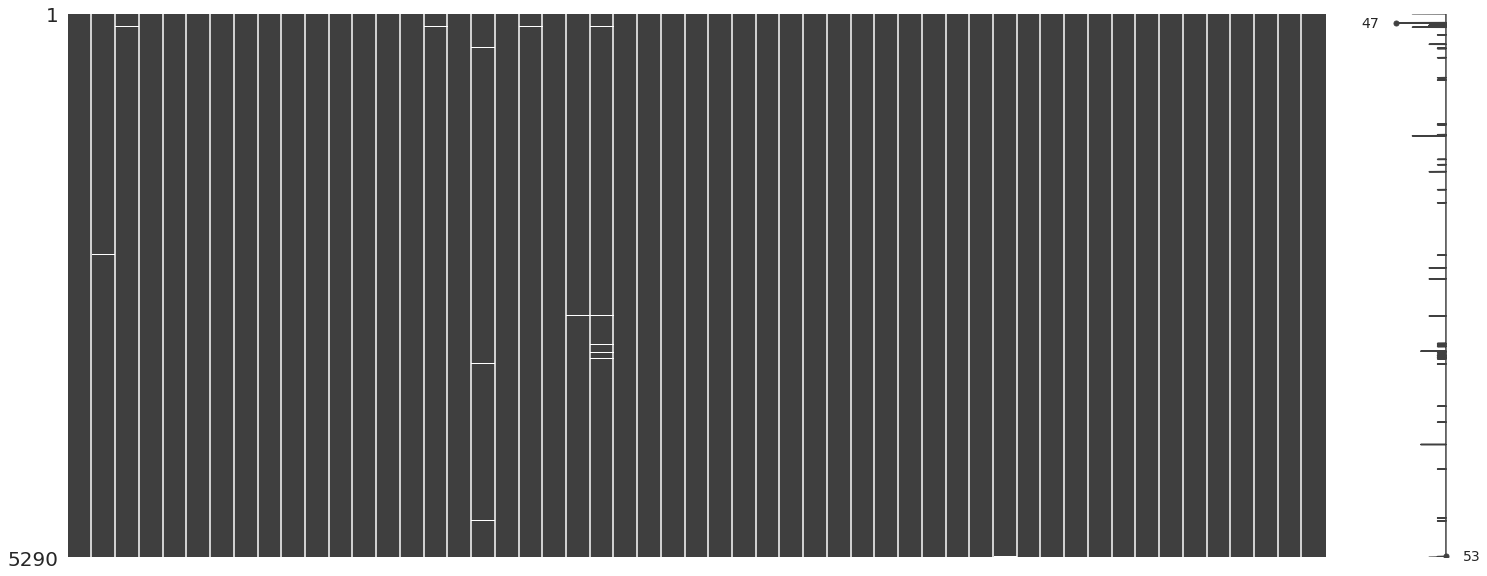

In [1037]:
msno.matrix(TEST.sort_values('secondary_cleaner.state.floatbank3_a_air'))

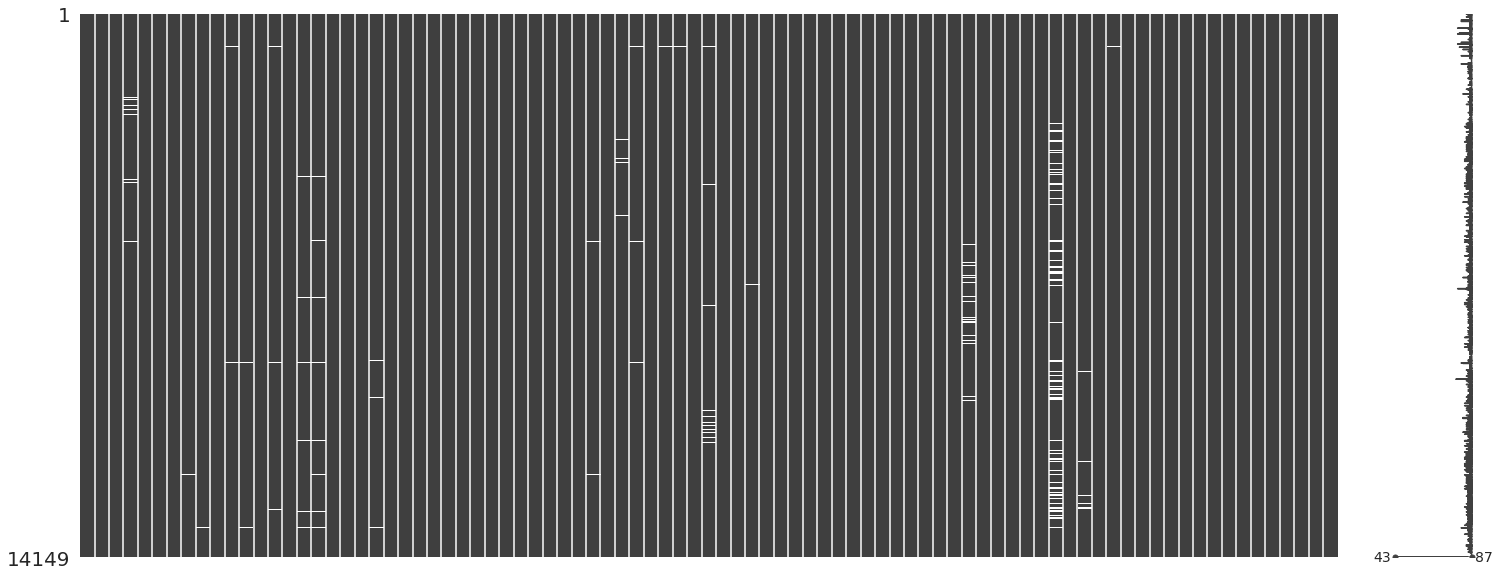

In [1038]:
msno.matrix(TRAIN.sort_values('secondary_cleaner.state.floatbank3_a_air'))

Из визуализации видно, что пропуски есть во многом у одних и тех же наблюдений

In [1039]:
TRAIN.isna().sum().sort_values().tail(100)

date                                           0
rougher.output.concentrate_pb                  0
rougher.state.floatbank10_f_level              0
rougher.state.floatbank10_f_air                0
rougher.state.floatbank10_e_level              0
                                            ... 
secondary_cleaner.state.floatbank2_a_air     217
primary_cleaner.output.concentrate_sol       286
rougher.input.floatbank11_xanthate           428
rougher.state.floatbank10_e_air              436
secondary_cleaner.output.tail_sol           1605
Length: 87, dtype: int64

In [1040]:
TEST.isna().sum().sort_values().tail(100)

date                                           0
rougher.state.floatbank10_c_air                0
rougher.state.floatbank10_c_level              0
rougher.state.floatbank10_d_air                0
rougher.state.floatbank10_d_level              0
rougher.state.floatbank10_e_air                0
rougher.state.floatbank10_e_level              0
rougher.state.floatbank10_f_air                0
rougher.state.floatbank10_f_level              0
secondary_cleaner.state.floatbank2_a_level     0
secondary_cleaner.state.floatbank2_b_level     0
secondary_cleaner.state.floatbank3_a_level     0
secondary_cleaner.state.floatbank3_b_air       0
secondary_cleaner.state.floatbank3_b_level     0
secondary_cleaner.state.floatbank4_a_air       0
secondary_cleaner.state.floatbank4_a_level     0
secondary_cleaner.state.floatbank4_b_air       0
secondary_cleaner.state.floatbank4_b_level     0
secondary_cleaner.state.floatbank5_a_air       0
secondary_cleaner.state.floatbank5_a_level     0
secondary_cleaner.st

In [1041]:
cols = list(TRAIN.columns)

Сами пропуски - это вторичные для нас данные о хвостах, но пропусков много

### Проведите предобработку данных

Так как нам данные изначально дали в разделенном на трейн и тест виде, и при этом у нас есть FULL со всеми данными, то заполним недостающие фрагменты из данных датасетов

In [1042]:
# TRAIN = TRAIN.fillna(FULL)
# TRAIN = TRAIN.fillna(TEST)
# TEST = TEST.fillna(FULL)
# TEST = TEST.fillna(TRAIN)
# FULL = FULL.fillna(TEST)
# FULL = FULL.fillna(TRAIN)

In [1043]:
TRAIN.head(3)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


In [1044]:
cols = [
    'final.output.tail_ag',
    'rougher.calculation.floatbank11_sulfate_to_au_feed',
    'rougher.calculation.floatbank10_sulfate_to_au_feed',
    'primary_cleaner.input.xanthate',
    'rougher.calculation.sulfate_to_au_concentrate',
    'rougher.input.feed_sol',
    'primary_cleaner.output.tail_ag',
    'secondary_cleaner.output.tail_pb',
    'rougher.output.concentrate_sol',
    'primary_cleaner.output.tail_sol',
    'primary_cleaner.output.tail_pb',
    'rougher.input.floatbank11_xanthate',
    'primary_cleaner.output.concentrate_pb',
    'primary_cleaner.output.concentrate_sol',
    'secondary_cleaner.output.tail_sol',
    'final.output.tail_sol',
    'final.output.concentrate_pb',
    'final.output.concentrate_ag',
    'final.output.tail_pb',
    'final.output.concentrate_sol',
]

In [1046]:
TRAIN.dropna(inplace=True)
TRAIN.isna().sum().sort_values().tail(10)

rougher.calculation.sulfate_to_au_concentrate         0
primary_cleaner.state.floatbank8_d_level              0
primary_cleaner.state.floatbank8_d_air                0
primary_cleaner.state.floatbank8_c_level              0
primary_cleaner.state.floatbank8_c_air                0
primary_cleaner.state.floatbank8_b_level              0
primary_cleaner.state.floatbank8_b_air                0
primary_cleaner.state.floatbank8_a_level              0
rougher.calculation.floatbank10_sulfate_to_au_feed    0
secondary_cleaner.state.floatbank6_a_level            0
dtype: int64

Пропусков на трейне нет

In [1047]:
TEST.dropna(inplace=True)
TEST.isna().sum().sort_values().tail(10)

rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate            0
rougher.input.floatbank11_sulfate             0
rougher.input.floatbank11_xanthate            0
rougher.state.floatbank10_a_air               0
rougher.state.floatbank10_b_air               0
secondary_cleaner.state.floatbank6_a_level    0
dtype: int64

На тесте пропусков нет

In [1048]:
FULL = FULL.sort_values('date').fillna(method='ffill')
FULL.isna().sum().sort_values().tail(10)

rougher.calculation.sulfate_to_au_concentrate         0
primary_cleaner.state.floatbank8_d_level              0
primary_cleaner.state.floatbank8_d_air                0
primary_cleaner.state.floatbank8_c_level              0
primary_cleaner.state.floatbank8_c_air                0
primary_cleaner.state.floatbank8_b_level              0
primary_cleaner.state.floatbank8_b_air                0
primary_cleaner.state.floatbank8_a_level              0
rougher.calculation.floatbank10_sulfate_to_au_feed    0
secondary_cleaner.state.floatbank6_a_level            0
dtype: int64

In [1049]:
TRAIN['date'].nunique(), TEST['date'].nunique(), FULL['date'].nunique()

(11017, 5229, 19439)

In [1050]:
def reduce_mem_usage(props):
    start_mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage of properties dataframe is :", start_mem_usg," MB")
    NAlist = [] # Keeps track of columns that have missing values filled in. 
    for col in props.columns:
        if props[col].dtype != object:  # Exclude strings
            
            # Print current column type
            print("******************************")
            print("Column: ",col)
            print("dtype before: ",props[col].dtype)
            
            # make variables for Int, max and min
            IsInt = False
            mx = props[col].max()
            mn = props[col].min()
            
            # Integer does not support NA, therefore, NA needs to be filled
            if not np.isfinite(props[col]).all(): 
                NAlist.append(col)
                props[col].fillna(mn-1,inplace=True)  
                   
            # test if column can be converted to an integer
            asint = props[col].fillna(0).astype(np.int64)
            try:
                result = (props[col] - asint)
                result = result.sum()
                if result > -0.01 and result < 0.01:
                    IsInt = True

                # Make Integer/unsigned Integer datatypes
                if IsInt:
                    if mn >= 0:
                        if mx < 255:
                            props[col] = props[col].astype(np.uint8)
                        elif mx < 65535:
                            props[col] = props[col].astype(np.uint16)
                        elif mx < 4294967295:
                            props[col] = props[col].astype(np.uint32)
                        else:
                            props[col] = props[col].astype(np.uint64)
                    else:
                        if mn > np.iinfo(np.int8).min and mx < np.iinfo(np.int8).max:
                            props[col] = props[col].astype(np.int8)
                        elif mn > np.iinfo(np.int16).min and mx < np.iinfo(np.int16).max:
                            props[col] = props[col].astype(np.int16)
                        elif mn > np.iinfo(np.int32).min and mx < np.iinfo(np.int32).max:
                            props[col] = props[col].astype(np.int32)
                        elif mn > np.iinfo(np.int64).min and mx < np.iinfo(np.int64).max:
                            props[col] = props[col].astype(np.int64)    

                # Make float datatypes 32 bit
                else:
                    props[col] = props[col].astype(np.float32)

                # Print new column type
                print("dtype after: ",props[col].dtype)
                print("******************************")
            except TypeError:
                pass
    
    # Print final result
    print("___MEMORY USAGE AFTER COMPLETION:___")
    mem_usg = props.memory_usage().sum() / 1024**2 
    print("Memory usage is: ",mem_usg," MB")
    print("This is ",100*mem_usg/start_mem_usg,"% of the initial size")
    return props, NAlist

In [1051]:
TEST, NAlist = reduce_mem_usage(TEST)

Memory usage of properties dataframe is : 2.1542816162109375  MB
******************************
Column:  primary_cleaner.input.sulfate
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  primary_cleaner.input.depressant
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  primary_cleaner.input.feed_size
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  primary_cleaner.input.xanthate
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  primary_cleaner.state.floatbank8_a_air
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  primary_cleaner.state.floatbank8_a_level
dtype before:  float64
dtype after:  float32
******************************
******************************
Co

In [1052]:
TRAIN, NAlist = reduce_mem_usage(TRAIN)

Memory usage of properties dataframe is : 7.39666748046875  MB
******************************
Column:  final.output.concentrate_ag
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  final.output.concentrate_pb
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  final.output.concentrate_sol
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  final.output.concentrate_au
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  final.output.recovery
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  final.output.tail_ag
dtype before:  float64
dtype after:  float32
******************************
******************************
Column:  final.output.tail_pb
dtype before:  float64
d

In [1053]:
TEST.shape, TRAIN.shape

((5229, 53), (11017, 87))

## Анализ данных

### Посмотрите, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. Опишите выводы

In [1054]:
TRAIN[[
    'rougher.output.concentrate_au',
    'primary_cleaner.output.concentrate_au',
    'final.output.concentrate_au',
]].describe()

,rougher.output.concentrate_au,primary_cleaner.output.concentrate_au,final.output.concentrate_au
count,11017.000000,11017.000000,11017.000000
mean,19.776789,32.380989,44.131634
std,3.600455,5.328369,4.171270
min,0.000000,0.000000,0.000000
25%,18.835323,30.705889,43.243793
50%,20.262238,33.017231,44.802197
75%,21.662943,35.154232,46.092316
max,28.146837,45.933933,51.571884


По среднему(или медиане, так ка кони примерно равны, что кстати говорит об отсутствии выбросов) можно сказать что после шага Флотация у нас 19.44 единиц сырья золота, после первого этапа очистки - 32.39, и далее на финале у нас 44.00 единиц сырья. Т.о. после 2 этапов очистки у нас почти в 2 раза больше единиц сырья, чем изначально.

In [1055]:
TRAIN[[
    'rougher.output.concentrate_ag',
    'primary_cleaner.output.concentrate_ag',
    'final.output.concentrate_ag',
]].describe()

,rougher.output.concentrate_ag,primary_cleaner.output.concentrate_ag,final.output.concentrate_ag
count,11017.000000,11017.000000,11017.000000
mean,11.841982,8.437251,5.156333
std,2.686593,1.888579,1.340491
min,0.000000,0.000000,0.000000
25%,10.460493,7.383838,4.231103
50%,11.797794,8.436412,4.999314
75%,13.494582,9.683331,5.852710
max,21.725695,15.005790,16.001945


Что касается серебра, то после каждого следующего этапа очистки его становится меньше по средним показателям: 11.77 перед первым этапом очистки, 8.2 после первого и 5.14 после второго. Предположу, что серебро гораздо чаще золота вступает в реакцию с другими металлами, в частности с медью, от которой также очищают, по этому возможно это происходит по этой причине.

In [1056]:
TRAIN[[
    'rougher.output.concentrate_pb',
    'primary_cleaner.output.concentrate_pb',
    'final.output.concentrate_pb',
]].describe()

,rougher.output.concentrate_pb,primary_cleaner.output.concentrate_pb,final.output.concentrate_pb
count,11017.000000,11017.000000,11017.000000
mean,7.612322,9.574924,10.172687
std,1.718284,2.538085,1.589666
min,0.000000,0.000000,0.000000
25%,6.819439,8.351604,9.279625
50%,7.708693,9.919856,10.347530
75%,8.547193,11.226036,11.187017
max,12.702148,17.081278,17.031900


Меди становится стабильно болше после каждого этапа очистки: 7.66, 9.59, 10.13

### Сравните распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

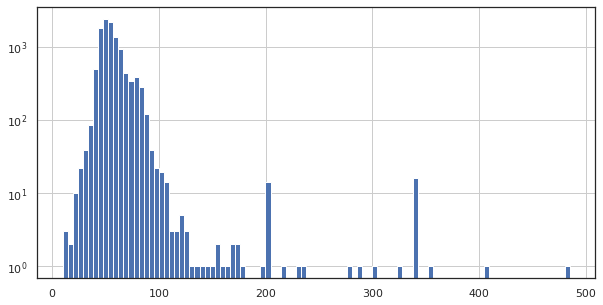

In [1057]:
TRAIN['rougher.input.feed_size'].hist(figsize=(10, 5), bins=100, log=True)

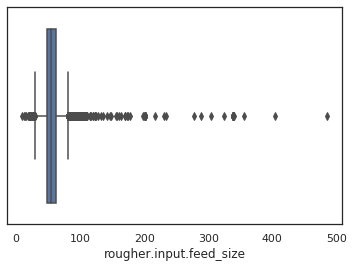

In [1058]:
sns.boxplot(TRAIN['rougher.input.feed_size'])

Видим, что у нас есть небольшое количество наблюдений, сильно оторванных от основной массы, возможно  такие действительно есть, попробуем взять наблюдения без них

In [1059]:
TRAIN = TRAIN[TRAIN['rougher.input.feed_size'] < 200]

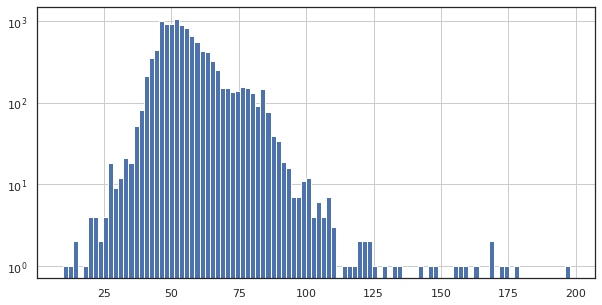

In [1061]:
TRAIN['rougher.input.feed_size'].hist(figsize=(10, 5), bins=100, log=True)

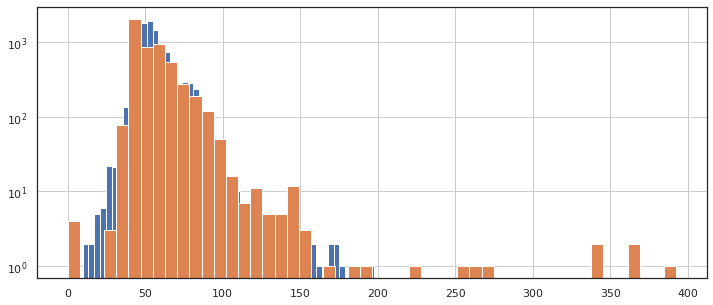

In [1062]:
ax = TRAIN['rougher.input.feed_size'].hist(figsize=(12, 5), bins=50, log=True)
TEST['rougher.input.feed_size'].hist(figsize=(12, 5), bins=50, ax=ax)

In [1063]:
TEST['rougher.input.feed_size'].mean(), TEST['rougher.input.feed_size'].median()

(55.86398, 50.772728)

Параметр feed_size после Флотации распределен примерно одинаково на трейне и тесте со смещением на 5, если бы мы говорили только о среднем с таким смещением, то можно было бы говорить о выбросах, но и медиана аналогично "отстает"

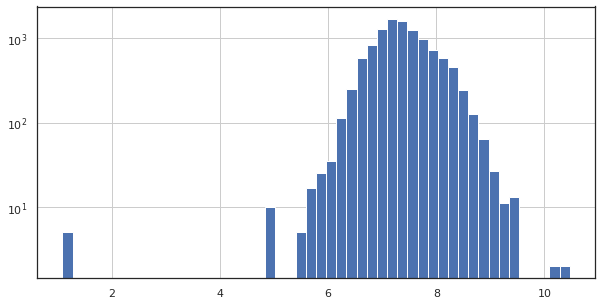

In [1064]:
TRAIN['primary_cleaner.input.feed_size'].hist(figsize=(10, 5), bins=50, log=True)

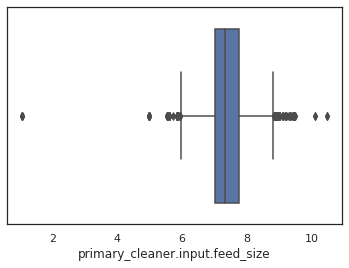

In [1065]:
sns.boxplot(TRAIN['primary_cleaner.input.feed_size'])

Аналогично тут явно возможные, но сильно отличные наблюдения, которые будут вносить шум

In [1066]:
TRAIN = TRAIN[TRAIN['primary_cleaner.input.feed_size'] > 2]

In [1067]:
TRAIN['primary_cleaner.input.feed_size'].mean(), TRAIN['primary_cleaner.input.feed_size'].median()

(7.39991, 7.33)

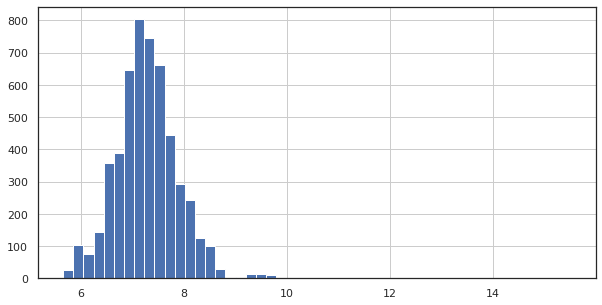

In [1068]:
TEST['primary_cleaner.input.feed_size'].hist(figsize=(10, 5), bins=50)

In [1069]:
TEST['primary_cleaner.input.feed_size'].mean(), TEST['primary_cleaner.input.feed_size'].median()

(7.271546, 7.25)

Параметр feed_size после Первой очистки распределен примерно одинаково на трейне и тесте

### Исследуйте суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах

Стадия **Флотация**

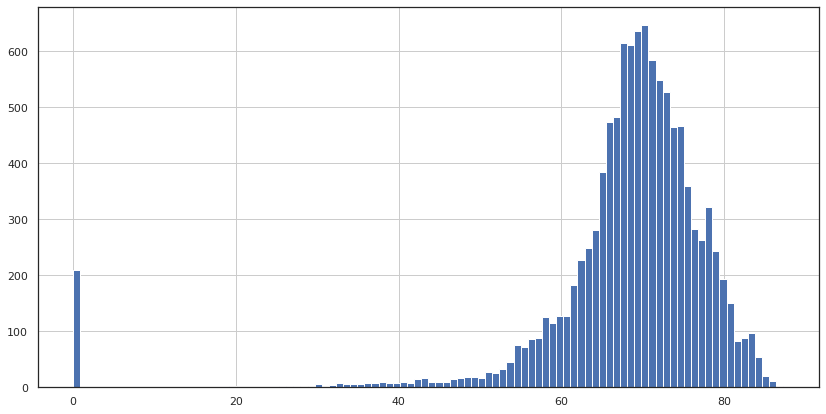

In [1070]:
first_stage = pd.DataFrame(TRAIN['rougher.output.concentrate_ag'] + TRAIN['rougher.output.concentrate_pb'] + \
TRAIN['rougher.output.concentrate_sol'] + TRAIN['rougher.output.concentrate_au'], columns=['rougher.output.sum']).sum(axis=1)
first_stage.hist(bins=100, figsize=(14,7))

In [1071]:
first_stage.describe()

count    10972.000000
mean        67.890793
std         12.267904
min          0.000000
25%         65.455933
50%         69.698956
75%         73.939993
max         87.273438
dtype: float64

Есть наблюдения где у нас есть нули, что не очень хорошо.

Стадия **Первичная очистка**

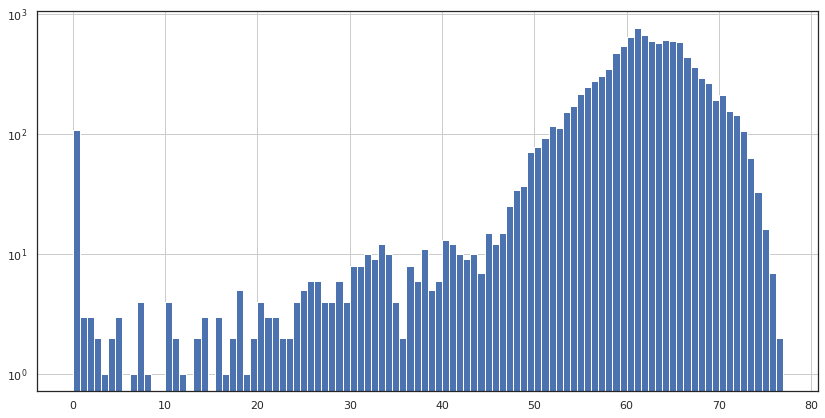

In [1072]:
second_stage = pd.DataFrame(TRAIN['primary_cleaner.output.concentrate_ag'] + TRAIN['primary_cleaner.output.concentrate_pb'] + \
TRAIN['primary_cleaner.output.concentrate_sol'] + TRAIN['primary_cleaner.output.concentrate_au'], columns=['primary_cleaner.output.sum']).sum(axis=1)
second_stage.hist(bins=100, figsize=(14,7), log=True)

In [1073]:
second_stage.describe()

count    10972.000000
mean        60.744007
std          9.495549
min          0.000000
25%         58.562236
50%         61.976963
75%         65.491632
max         76.918076
dtype: float64

Аналогично и тут с нулями

Стадия **Финальная**

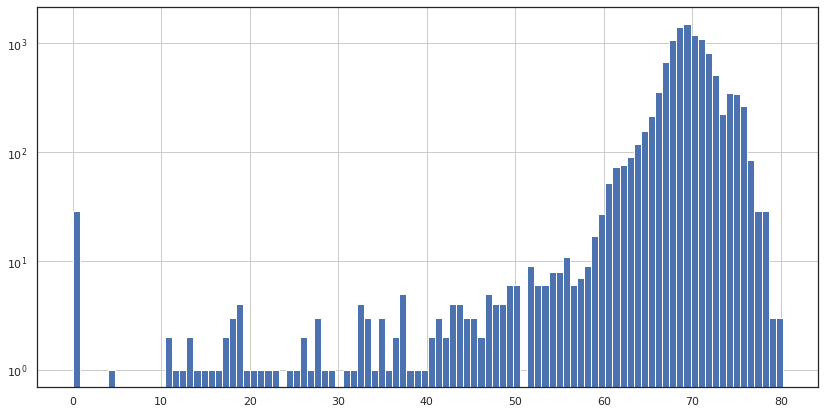

In [1074]:
final_stage = pd.DataFrame(TRAIN['final.output.concentrate_ag'] + TRAIN['final.output.concentrate_pb'] + \
TRAIN['final.output.concentrate_sol'] + TRAIN['final.output.concentrate_au'], columns=['final.output.sum']).sum(axis=1)
final_stage.hist(bins=100, figsize=(14,7), log=True)

In [1075]:
final_stage.describe()

count    10972.000000
mean        69.058128
std          6.002674
min          0.000000
25%         67.905945
50%         69.462940
75%         71.310246
max         80.210648
dtype: float64

Напишем функцию которая уберет нам выбросные нули

In [1076]:
limit = 0.01
def del_zeroes(df):
    for col in list(df.columns):
        if 'concentrate' in col:
            df = df[df[col] > limit]
    return df

In [1077]:
TRAIN = del_zeroes(TRAIN)
TEST = del_zeroes(TEST)

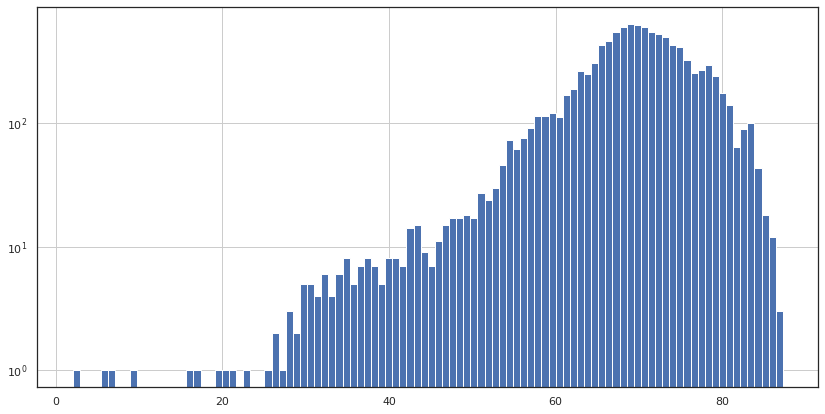

In [1078]:
first_stage = pd.DataFrame(TRAIN['rougher.output.concentrate_ag'] + TRAIN['rougher.output.concentrate_pb'] + \
TRAIN['rougher.output.concentrate_sol'] + TRAIN['rougher.output.concentrate_au'], columns=['rougher.output.sum']).sum(axis=1)
first_stage.hist(bins=100, figsize=(14,7), log=True)

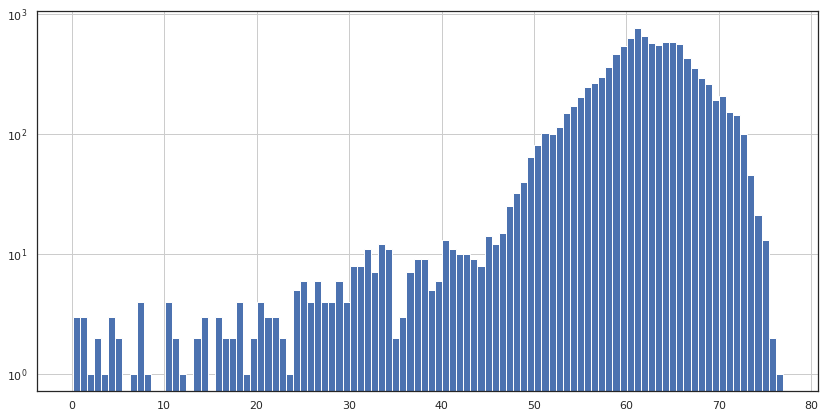

In [1079]:
second_stage = pd.DataFrame(TRAIN['primary_cleaner.output.concentrate_ag'] + TRAIN['primary_cleaner.output.concentrate_pb'] + \
TRAIN['primary_cleaner.output.concentrate_sol'] + TRAIN['primary_cleaner.output.concentrate_au'], columns=['primary_cleaner.output.sum']).sum(axis=1)
second_stage.hist(bins=100, figsize=(14,7), log=True)

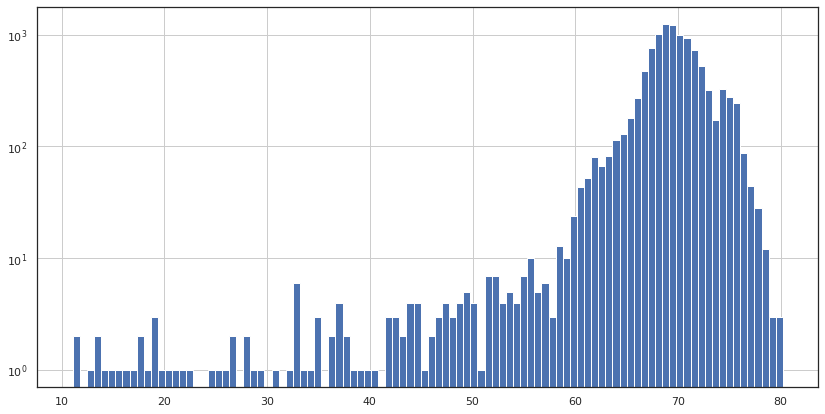

In [1080]:
final_stage = pd.DataFrame(TRAIN['final.output.concentrate_ag'] + TRAIN['final.output.concentrate_pb'] + \
TRAIN['final.output.concentrate_sol'] + TRAIN['final.output.concentrate_au'], columns=['final.output.sum']).sum(axis=1)
final_stage.hist(bins=100, figsize=(14,7), log=True)

Хвосты убрали

### Посмотрим на наши целевые признаки - ['final.output.recovery', 'rougher.output.recovery']

Выдели месяц для удобства группировки по дате

In [1081]:
TRAIN['month'] = TRAIN['date'].apply(lambda x: x[:7])
TRAIN['month'].head()

0    2016-01
1    2016-01
2    2016-01
3    2016-01
4    2016-01
Name: month, dtype: object

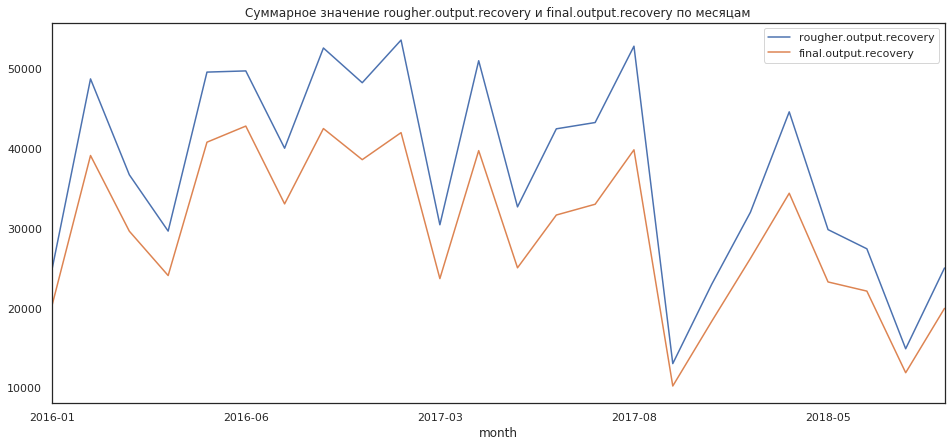

In [1082]:
ax = TRAIN.groupby('month')['rougher.output.recovery']\
    .agg('sum')\
    .plot(
        x='date', 
        y='rougher.output.recovery', 
        legend=True, 
        figsize=(16, 7),
)
TRAIN.groupby('month')['final.output.recovery']\
    .agg('sum')\
    .plot(
        ax=ax,
        x='date', 
        y='rougher.output.recovery', 
        title='Суммарное значение rougher.output.recovery и final.output.recovery по месяцам', 
        legend=True, 
        figsize=(16, 7),
)

Хорошо прослеживается суммарные значения целевых признаков по месяцам, чем больше у нас эффективность обогащения чернового концентрата, тем больше эффективность обогащения финального концентрата. Так же есть закономерность, чем больше значение на черновом этапе, тем больше разница по сравнению с финальным результатом. Например разница буквально за месяц до 2017-08 такая разница была 10000, после падения 2017-09 уже меньше 5000. То есть повышение эффективности обогащения чернового концентрата не дает нам гарантии повышения эффективности обогащения финального концентрата на такую же величину.

## Модель

### Напишите функцию для вычисления итоговой sMAPE

In [1083]:
def smape(y, y_pred):
    return 100 / len(y) * np.sum(2 * np.abs(y - y_pred) / (np.abs(y) + np.abs(y_pred)))

In [1084]:
def final_smape(smape_rougher, smape_final):
    return (0.25 * smape_rougher) + (0.75 * smape_final)

### Обучите разные модели и оцените их качество кросс-валидацией. Выберите лучшую модель и проверьте её на тестовой выборке. Опишите выводы

#### Модель 1. Поиск наилучшей модели для целевого признака 'rougher.output.recovery'

In [1085]:
# Так как нас интересует стадия rougher, отберем колонки этой стадии в TEST
cols = []
for col in TEST.columns:
    if 'rougher' in col and 'recovery' not in col:
        cols.append(col)
        print(f"'{col}',")

'rougher.input.feed_ag',
'rougher.input.feed_pb',
'rougher.input.feed_rate',
'rougher.input.feed_size',
'rougher.input.feed_sol',
'rougher.input.feed_au',
'rougher.input.floatbank10_sulfate',
'rougher.input.floatbank10_xanthate',
'rougher.input.floatbank11_sulfate',
'rougher.input.floatbank11_xanthate',
'rougher.state.floatbank10_a_air',
'rougher.state.floatbank10_a_level',
'rougher.state.floatbank10_b_air',
'rougher.state.floatbank10_b_level',
'rougher.state.floatbank10_c_air',
'rougher.state.floatbank10_c_level',
'rougher.state.floatbank10_d_air',
'rougher.state.floatbank10_d_level',
'rougher.state.floatbank10_e_air',
'rougher.state.floatbank10_e_level',
'rougher.state.floatbank10_f_air',
'rougher.state.floatbank10_f_level',


In [1089]:
first_model_cols = [
    'rougher.input.feed_ag',
    'rougher.input.feed_pb',
    'rougher.input.feed_rate',
    'rougher.input.feed_size',
    'rougher.input.feed_sol',
    'rougher.input.feed_au',
    'rougher.input.floatbank10_sulfate',
    'rougher.input.floatbank10_xanthate',
    'rougher.input.floatbank11_sulfate',
    'rougher.input.floatbank11_xanthate',
    'rougher.state.floatbank10_a_air',
    'rougher.state.floatbank10_a_level',
    'rougher.state.floatbank10_b_air',
    'rougher.state.floatbank10_b_level',
    'rougher.state.floatbank10_c_air',
    'rougher.state.floatbank10_c_level',
    'rougher.state.floatbank10_d_air',
    'rougher.state.floatbank10_d_level',
    'rougher.state.floatbank10_e_air',
    'rougher.state.floatbank10_e_level',
    'rougher.state.floatbank10_f_air',
    'rougher.state.floatbank10_f_level',
]
first_model_target = [
    'rougher.output.recovery',
]

In [1090]:
def linear_regression(df, target):
    # разбиение на таргет и фичи
    features = df.drop([target], axis=1)
    target = df[target]
    
    # создаем объект MinMaxScaler для масштабирования признаков, по дефолту диапазон default=(0, 1)
    scaler = MinMaxScaler()
    features = scaler.fit_transform(features)
    # features_valid = scaler.transform(features_valid)
    
    # создадим модель
    model = LinearRegression()
    
    scorer = make_scorer(smape, greater_is_better=False)
    kf = KFold(shuffle=True, n_splits=5)
    score = cross_val_score(model, features, target, scoring=scorer, cv=kf)
    # обучим на тренировочных данных
    model.fit(features, target)

    count_smape = sum(score)/len(score)
    print(score)
    print(f"Симметричный средний процент отклонения (MAPE – Mean Absolute Percent Error): {count_smape:.2f}")
    
    return model

In [1091]:
model = linear_regression(TRAIN[first_model_cols + first_model_target], 'rougher.output.recovery')

[-4.53054594 -4.83161801 -4.48575368 -4.56428366 -4.74620433]
Симметричный средний процент отклонения (MAPE – Mean Absolute Percent Error): -4.63


SMAPE отвечает на вопрос "какой процент составляет ошибка от этой самой величины y(среднее)?". Получаем 4.63%

In [1092]:
def random_forest_regression(df, target):
    # разбиение на таргет и фичи
    features = df.drop([target], axis=1)
    target = df[target]

    kf = KFold(shuffle=True, n_splits=5)
    best_score = np.inf
    best_est = 0
    best_depth = 0
    for n_estimators in range(20, 33, 3):
        for max_depth in range(20, 37, 4):
            # создадим модель
            model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=13)
            
            # Перекрестная проверка лучше, чем разделение набора данных. 
            # Это связано с тем, что если вы попробуете свою модель более чем на одном тестовом наборе 
            # (что делает cross_val_score), то можно избежать переобучения. 
            # Кроме того, у cross_val_score есть много полезных параметров, 
            # которые в противном случае можно было бы реализовать, написав больше строк кода. 
            # Например, вы можете выбирать из различных или использовать собственные методы оценки, 
            # а также стратегии разделения перекрестной проверки.
            
            # Train and score model on dataset with additional ratio features
            scorer = make_scorer(smape, greater_is_better=False)
            score = cross_val_score(model, features, target, scoring=scorer, cv=kf)
            score = [abs(i) for i in score]
            # print(sum(score)/len(score))
            

            if sum(score)/len(score) < best_score:
                best_score = sum(score)/len(score)
                best_est = n_estimators
                best_depth = max_depth
                print(f'best_score: {best_score}, n_estimators: {n_estimators}, max_depth: {max_depth}')
    # создадим лучшую модель
    print(f"best n_estimators: {best_est}, best max_depth: {best_depth}")
    model = RandomForestRegressor(n_estimators=best_est, max_depth=best_depth)

    # обучим на тренировочных данных
    model.fit(features, target)
    print(f"Симметричный средний процент отклонения (MAPE – Mean Absolute Percent Error): {best_score:.2f}")
    
    return model

In [1093]:
%%time

first_model = random_forest_regression(TRAIN[first_model_cols + first_model_target], 'rougher.output.recovery')

best_score: 2.630037331153759, n_estimators: 20, max_depth: 20
best_score: 2.618352961195625, n_estimators: 20, max_depth: 36
best_score: 2.6115574833565445, n_estimators: 23, max_depth: 32
best_score: 2.6064019354268573, n_estimators: 26, max_depth: 28
best_score: 2.6016866319741574, n_estimators: 26, max_depth: 32
best_score: 2.595922706125301, n_estimators: 29, max_depth: 28
best_score: 2.5928574671449898, n_estimators: 32, max_depth: 36
best n_estimators: 32, best max_depth: 36
Симметричный средний процент отклонения (MAPE – Mean Absolute Percent Error): 2.59
CPU times: user 6min 24s, sys: 79.7 ms, total: 6min 24s
Wall time: 6min 28s


- best n_estimators: 32, best max_depth: 28
- Симметричный средний процент отклонения (MAPE – Mean Absolute Percent Error): 2.57
- CPU times: user 6min 26s, sys: 216 ms, total: 6min 26s
- Wall time: 6min 32s

In [1094]:
first_model

RandomForestRegressor(max_depth=36, n_estimators=32)

#### Модель 2. Поиск наилучшей модели для целевого признака 'final.output.recovery'

In [1095]:
# Так как нас интересует стадии отличные от rougher, посмотрим какие колонки этой стадии есть в FULL, которых нет в TEST
cols = []
for col in TEST.columns:
    if ('primary' in col or 'secondary' in col or 'final' in col) and 'recovery' not in col:
        cols.append(col)
        print(f"'{col}',")

'primary_cleaner.input.sulfate',
'primary_cleaner.input.depressant',
'primary_cleaner.input.feed_size',
'primary_cleaner.input.xanthate',
'primary_cleaner.state.floatbank8_a_air',
'primary_cleaner.state.floatbank8_a_level',
'primary_cleaner.state.floatbank8_b_air',
'primary_cleaner.state.floatbank8_b_level',
'primary_cleaner.state.floatbank8_c_air',
'primary_cleaner.state.floatbank8_c_level',
'primary_cleaner.state.floatbank8_d_air',
'primary_cleaner.state.floatbank8_d_level',
'secondary_cleaner.state.floatbank2_a_air',
'secondary_cleaner.state.floatbank2_a_level',
'secondary_cleaner.state.floatbank2_b_air',
'secondary_cleaner.state.floatbank2_b_level',
'secondary_cleaner.state.floatbank3_a_air',
'secondary_cleaner.state.floatbank3_a_level',
'secondary_cleaner.state.floatbank3_b_air',
'secondary_cleaner.state.floatbank3_b_level',
'secondary_cleaner.state.floatbank4_a_air',
'secondary_cleaner.state.floatbank4_a_level',
'secondary_cleaner.state.floatbank4_b_air',
'secondary_cleaner.state

In [1098]:
second_model_cols = [
    'primary_cleaner.input.sulfate',
    'primary_cleaner.input.depressant',
    'primary_cleaner.input.feed_size',
    'primary_cleaner.input.xanthate',
    'primary_cleaner.state.floatbank8_a_air',
    'primary_cleaner.state.floatbank8_a_level',
    'primary_cleaner.state.floatbank8_b_air',
    'primary_cleaner.state.floatbank8_b_level',
    'primary_cleaner.state.floatbank8_c_air',
    'primary_cleaner.state.floatbank8_c_level',
    'primary_cleaner.state.floatbank8_d_air',
    'primary_cleaner.state.floatbank8_d_level',
    'secondary_cleaner.state.floatbank2_a_air',
    'secondary_cleaner.state.floatbank2_a_level',
    'secondary_cleaner.state.floatbank2_b_air',
    'secondary_cleaner.state.floatbank2_b_level',
    'secondary_cleaner.state.floatbank3_a_air',
    'secondary_cleaner.state.floatbank3_a_level',
    'secondary_cleaner.state.floatbank3_b_air',
    'secondary_cleaner.state.floatbank3_b_level',
    'secondary_cleaner.state.floatbank4_a_air',
    'secondary_cleaner.state.floatbank4_a_level',
    'secondary_cleaner.state.floatbank4_b_air',
    'secondary_cleaner.state.floatbank4_b_level',
    'secondary_cleaner.state.floatbank5_a_air',
    'secondary_cleaner.state.floatbank5_a_level',
    'secondary_cleaner.state.floatbank5_b_air',
    'secondary_cleaner.state.floatbank5_b_level',
    'secondary_cleaner.state.floatbank6_a_air',
    'secondary_cleaner.state.floatbank6_a_level',
]
second_model_target = ['final.output.recovery']

In [1099]:
model = linear_regression(TRAIN[second_model_cols + second_model_target], 'final.output.recovery')

[-7.25803366 -7.1507791  -7.44272461 -7.38081629 -7.5377901 ]
Симметричный средний процент отклонения (MAPE – Mean Absolute Percent Error): -7.35


Симметричный средний процент отклонения (MAPE – Mean Absolute Percent Error): 7.35

Посмотрим что с деревьями решений

In [1100]:
%%time

second_model = random_forest_regression(TRAIN[second_model_cols + second_model_target], 'final.output.recovery')

best_score: 5.502804349100944, n_estimators: 20, max_depth: 20
best_score: 5.498478765519477, n_estimators: 20, max_depth: 24
best_score: 5.4778865767881895, n_estimators: 20, max_depth: 28
best_score: 5.471120346015299, n_estimators: 20, max_depth: 32
best_score: 5.455745363109522, n_estimators: 23, max_depth: 24
best_score: 5.400701309167819, n_estimators: 23, max_depth: 32
best_score: 5.395971311902455, n_estimators: 26, max_depth: 32
best_score: 5.379581128879087, n_estimators: 29, max_depth: 24
best_score: 5.373939499660403, n_estimators: 32, max_depth: 36
best n_estimators: 32, best max_depth: 36
Симметричный средний процент отклонения (MAPE – Mean Absolute Percent Error): 5.37
CPU times: user 9min 44s, sys: 268 ms, total: 9min 44s
Wall time: 9min 48s


- best n_estimators: 32, best max_depth: 36
- Симметричный средний процент отклонения (MAPE – Mean Absolute Percent Error): 5.37
- CPU times: user 9min 44s, sys: 268 ms, total: 9min 44s
- Wall time: 9min 48s

#### Проверка моделей на тестовой выборке

Добавим таргет для проверки

In [1101]:
TEST = pd.merge(TEST, FULL[first_model_target + ['date']], how='inner', on='date')
TEST = pd.merge(TEST, FULL[second_model_target + ['date']], how='inner', on='date')

In [1102]:
TEST.shape

(5229, 55)

In [1103]:
# применим обученную первую модель на тестовых данных
predictions = first_model.predict(TEST[first_model_cols])
predictions = pd.Series(predictions)

count_smape_1 = smape(predictions, TEST[first_model_target].squeeze())

In [1104]:
count_smape_1

8.060744070097288

In [1105]:
# применим обученную вторую модель на тестовых данных
predictions = second_model.predict(TEST[second_model_cols])
predictions = pd.Series(predictions)

count_smape_2 = smape(predictions, TEST[second_model_target].squeeze())

In [1106]:
count_smape_2

12.91826298777175

In [1107]:
round(final_smape(count_smape_1, count_smape_2), 2)

11.7

Вывод:
- Загружены датасеты, у нас на входе 3 датасета, для обучения, для теста и общий, везде есть пропуски
- Заполнили пропуски с помощью KNN, дозаполнили пропуски в дальнейшем из общего датасета
- Там, где были аномалии, убрали их
- Исследовали изменение таргета на тесте и трейне, посмотрели график
- Обучили по 2 модели для 2-х таргетов, линейную регрессию и случайный лес, вторая модель показала себя лучше
- Выполнили подсчет итоговой метрики smape которая включается себя 1/4 от smape первой модели и 3/4 от smape второй модели - итог 10.93, то есть в среднем отклонение показателя регрессии наших таргетов на 10.93%

dummy_regressor_rougher = DummyRegressor(strategy="median")
dummy_regressor_rougher.fit(X_train, y_train_rougher)
dummy_rougher_pred = dummy_regressor_rougher.predict(X_test)
smape_dummy_rougher = smape(y_test_rougher, dummy_rougher_pred)
print(smape_dummy_rougher) 

И ДАЛЕЕ: ДЛЯ FINAL И ИТОГОВЫЙ

Что бы понять как обстоят наши дела по качеству модели для примера можно построить наивную модель и сравнить ее показатели с нашими:

In [1108]:
# первая модель
dummy_regressor_rougher = DummyRegressor(strategy="median")
dummy_regressor_rougher.fit(TRAIN[first_model_cols], TRAIN['rougher.output.recovery'])
dummy_rougher_pred = dummy_regressor_rougher.predict(TEST[first_model_cols])
smape_dummy_rougher = smape(dummy_rougher_pred, TEST[first_model_target].squeeze())
print(smape_dummy_rougher)

8.630353266610106


In [1109]:
# вторая модель
dummy_regressor_final = DummyRegressor(strategy="median")
dummy_regressor_final.fit(TRAIN[second_model_cols + second_model_target], TRAIN['final.output.recovery'])
dummy_final_pred = dummy_regressor_final.predict(TEST[second_model_cols])
smape_dummy_final = smape(dummy_final_pred, TEST[second_model_target].squeeze())
print(smape_dummy_final)

9.277942843454495


In [1110]:
round(final_smape(smape_dummy_rougher, smape_dummy_final), 2)

9.12